/** Imports,Reading data and  **/

In [ ]:
import pandas as pd;
from scipy.stats import zscore
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

df = pd.read_csv('../data/sierraleone-bumbuna.csv')

print("📊 Summary Statistics (Numeric Columns):")
print(df.describe())

📊 Summary Statistics (Numeric Columns):
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000

In [ ]:
import sys
!{sys.executable} -m pip install windrose


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\gagur\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
missing_counts = df.isna().sum()
print("\n📉 Missing Values Per Column:")
print(missing_counts)


📉 Missing Values Per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [ ]:
total_rows = len(df)
threshold = total_rows * 0.05
high_nulls = missing_counts[missing_counts > threshold]
print(f"\n⚠️ Columns with >5% Missing Values (more than {threshold} rows):")
print(high_nulls)


⚠️ Columns with >5% Missing Values (more than 26280.0 rows):
Comments    525600
dtype: int64


In [ ]:
target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 📉 Step 1: Missing values
print("\n🔍 Missing values before cleaning:")
print(df[target_cols].isna().sum())

# 🚨 Step 2: Z-score for outlier detection
z_scores = df[target_cols].apply(zscore)
outliers = (z_scores.abs() > 3)

print("\n🚨 Outlier count (|Z| > 3):")
print(outliers.sum())

# Optional: Flag outliers (you can drop or investigate later)
df['has_outlier'] = outliers.any(axis=1)

# -----------------------------
# 🧹 Step 3: Handle missing values — impute with median
for col in target_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# (Optional) You could also remove rows with too many missing/outliers

# -----------------------------
# ✅ Step 4: Drop helper column
df.drop(columns=['has_outlier'], inplace=True)

# -----------------------------
# 💾 Step 5: Export cleaned DataFrame
output_path = '../data/cleaned_data/sierraleone_clean.csv'

df.to_csv(output_path, index=False)
print(f"\n✅ Cleaned data saved to: {output_path}")


🔍 Missing values before cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

🚨 Outlier count (|Z| > 3):
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


C:\Users\gagur\AppData\Local\Temp\ipykernel_5192\1123201654.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\gagur\AppData\Local\Temp\ipykernel_5192\1123201654.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 


✅ Cleaned data saved to: ../data/cleaned_data/benin_clean.csv


In [ ]:
# Load cleaned data
df = pd.read_csv('../data/cleaned_data/sierraleone_clean.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index
df.set_index('Timestamp', inplace=True)

<Figure size 1400x600 with 0 Axes>

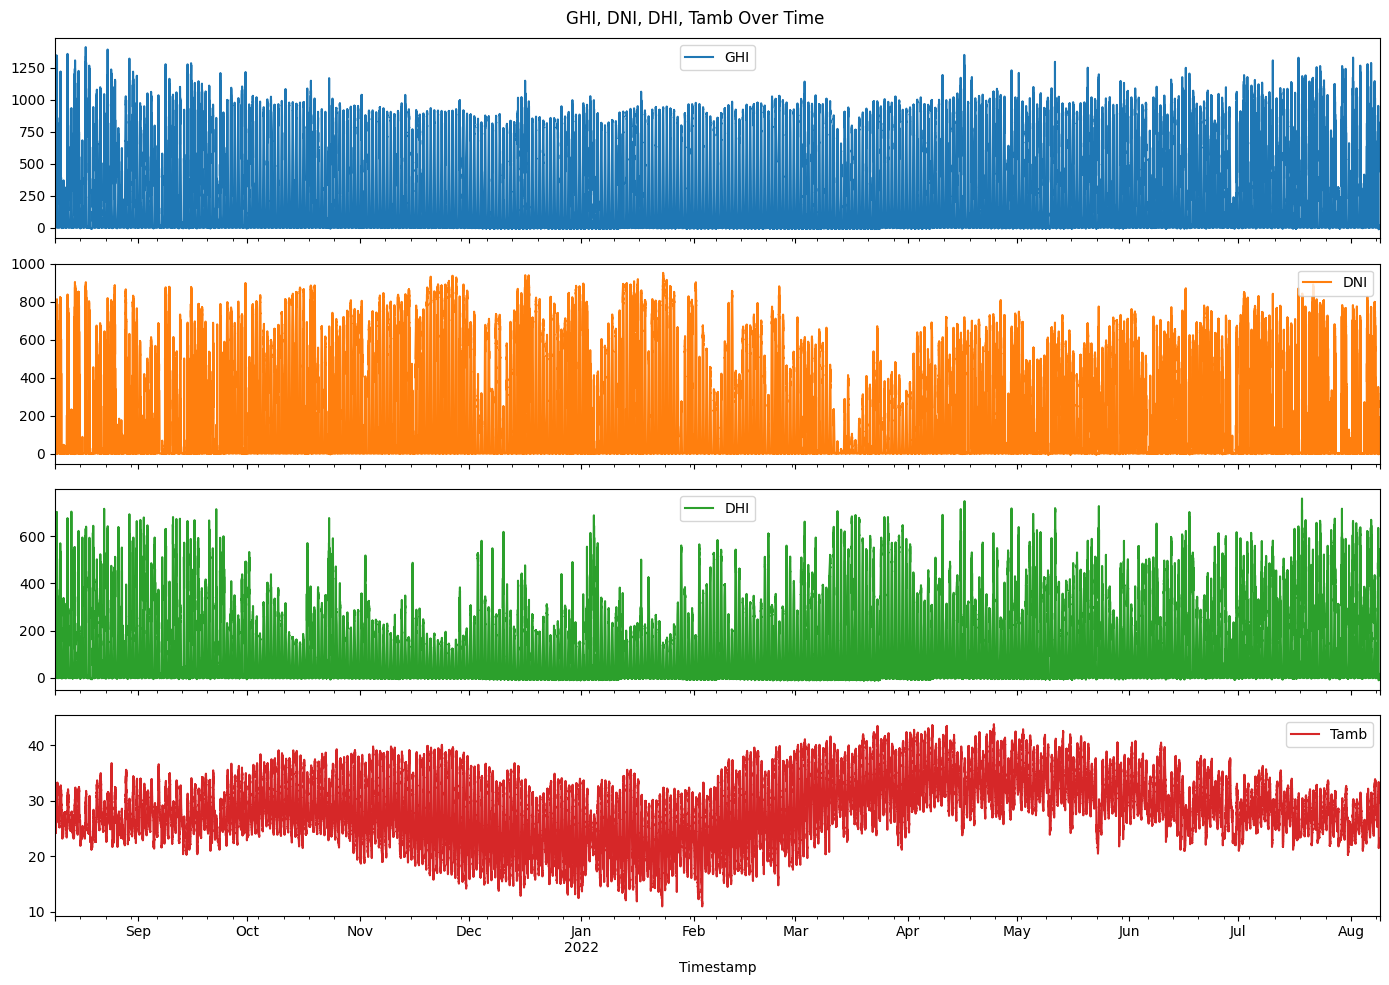

In [ ]:
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(14, 10), title='GHI, DNI, DHI, Tamb Over Time')
plt.tight_layout()
plt.show()


C:\Users\gagur\AppData\Local\Temp\ipykernel_5192\551446990.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


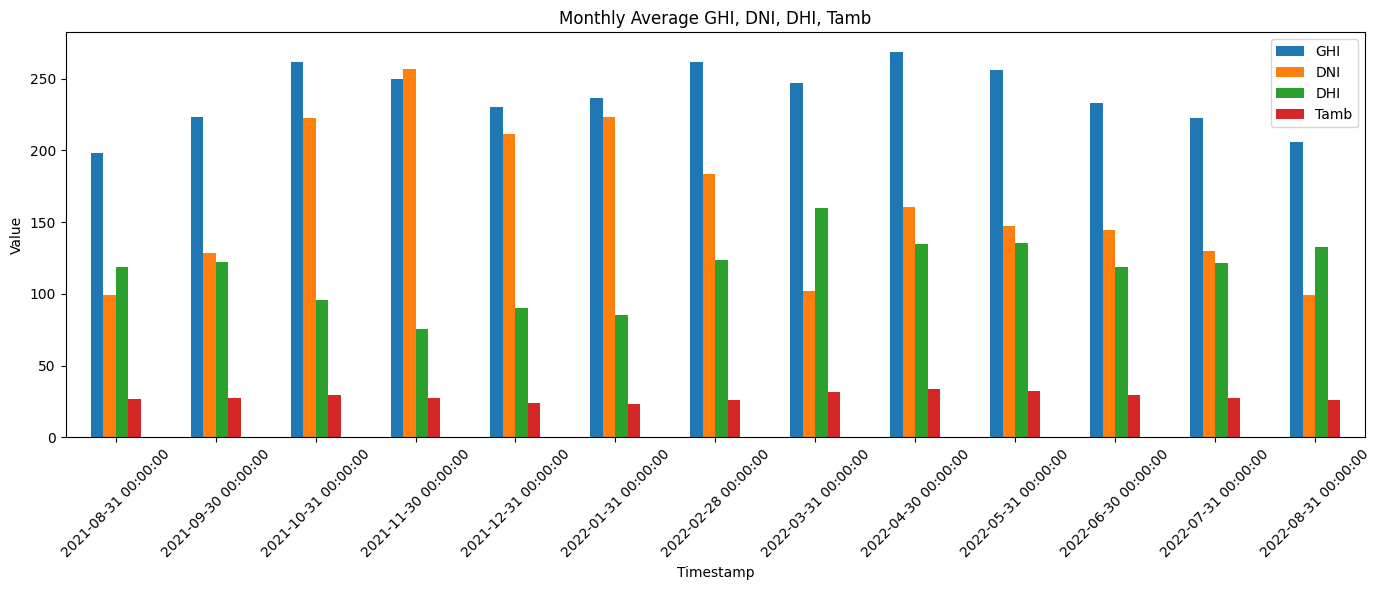

In [ ]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set it as index (only if not already set)
# df.set_index('Timestamp', inplace=True)
monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(14, 6), title='Monthly Average GHI, DNI, DHI, Tamb')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\gagur\AppData\Local\Temp\ipykernel_5192\4268154843.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


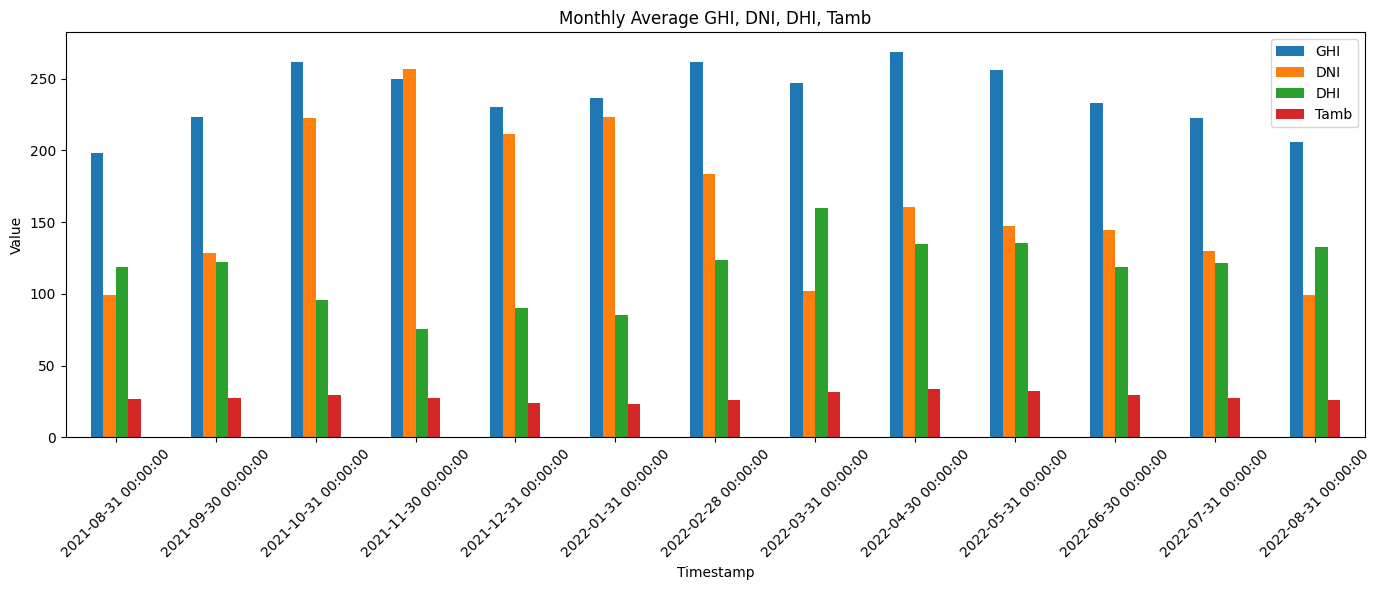

In [ ]:
monthly_avg = df.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(14, 6), title='Monthly Average GHI, DNI, DHI, Tamb')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


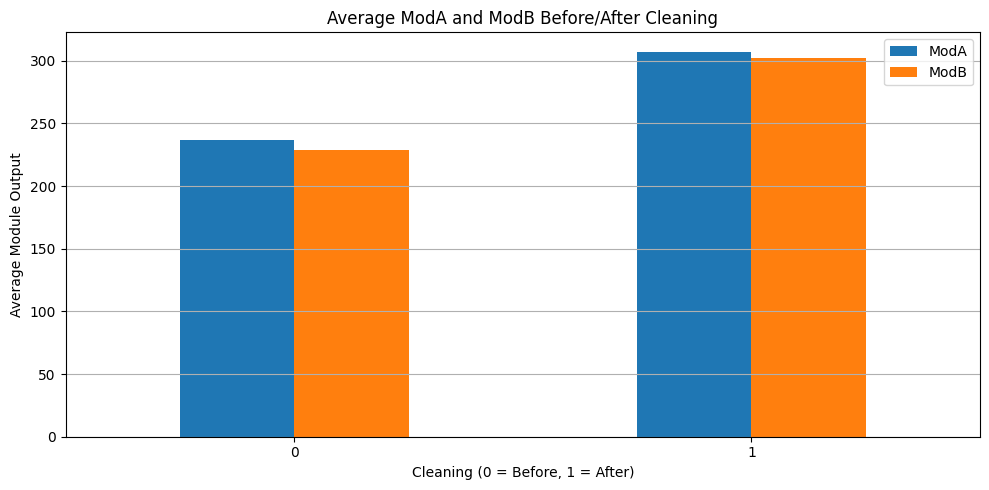

In [ ]:
# Group by Cleaning flag
cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting
cleaning_avg.plot(kind='bar', figsize=(10, 5), title='Average ModA and ModB Before/After Cleaning')

plt.xlabel('Cleaning (0 = Before, 1 = After)')
plt.ylabel('Average Module Output')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

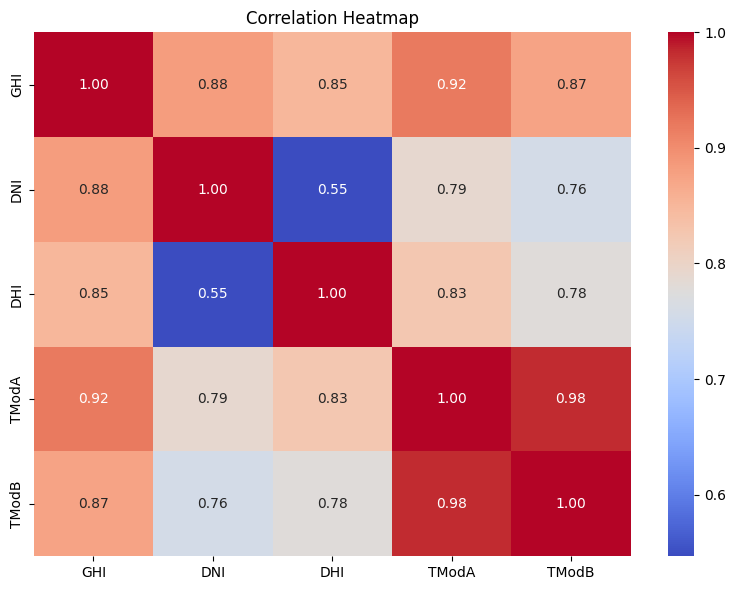

In [ ]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

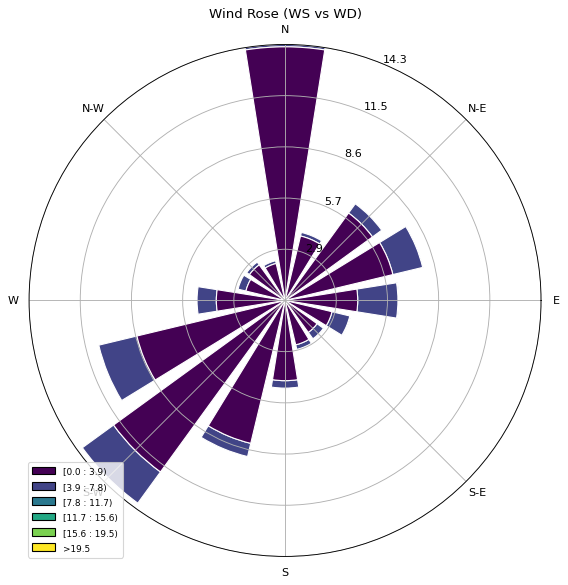

In [ ]:

# Create Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (WS vs WD)')
plt.show()


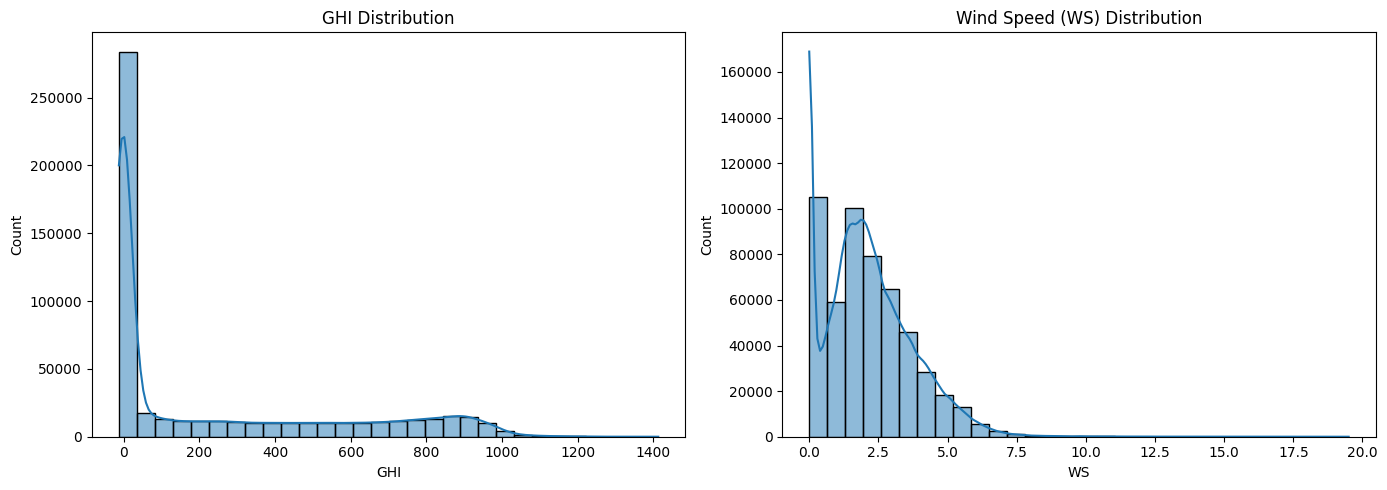

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# GHI Histogram
sns.histplot(df['GHI'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('GHI Distribution')

# WS Histogram
sns.histplot(df['WS'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Wind Speed (WS) Distribution')

plt.tight_layout()
plt.show()

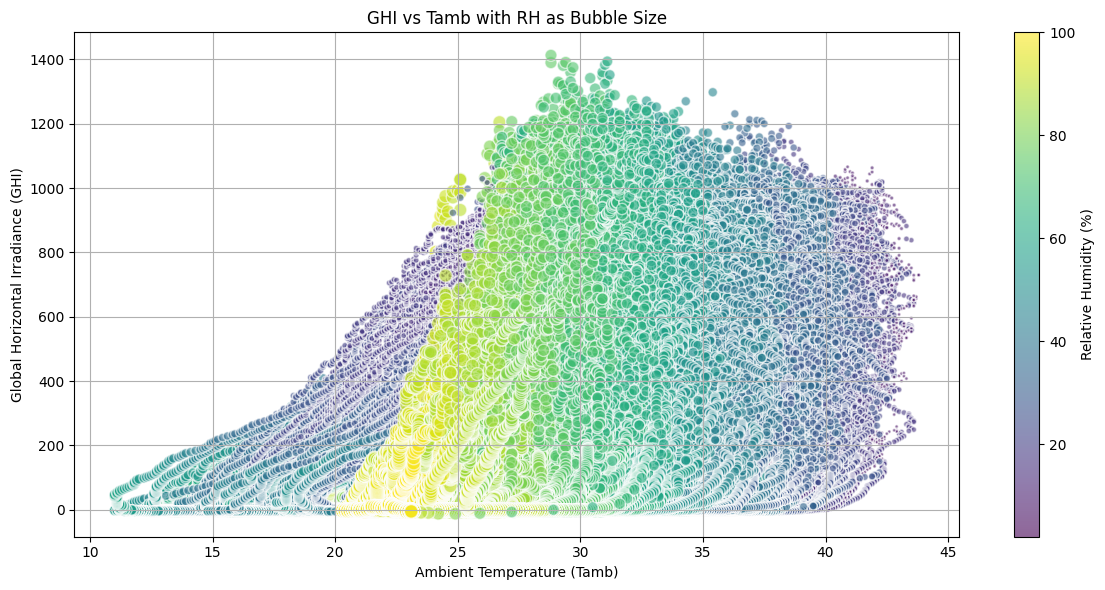

In [ ]:
plt.figure(figsize=(12, 6))
bubble = plt.scatter(
    df['Tamb'],       # X-axis: Temperature
    df['GHI'],        # Y-axis: Solar Irradiance
    s=df['RH'],       # Bubble size: Relative Humidity
    c=df['RH'],       # Color (optional): Relative Humidity
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('GHI vs Tamb with RH as Bubble Size')
plt.colorbar(bubble, label='Relative Humidity (%)')
plt.grid(True)
plt.tight_layout()
plt.show()